<a href="https://colab.research.google.com/github/IAMLATI/Firstproj/blob/main/Mnistwithoutflip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision 
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


import torch.nn.functional as F

from torchvision import transforms

import torchvision.datasets as dset


In [2]:
# config device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
#hyperparameters
input_size=784
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.03
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

In [4]:
#import dataset
transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

train_dataset=torchvision.datasets.MNIST(root='./', train=True, transform=transform, download=True)

test_dataset=torchvision.datasets.MNIST(root='./', train=False, transform=transform )

train_loader=DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes=('ZERO','ONE', 'TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE')


In [5]:
examples=iter(train_loader)
samples, labels=next(examples)
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


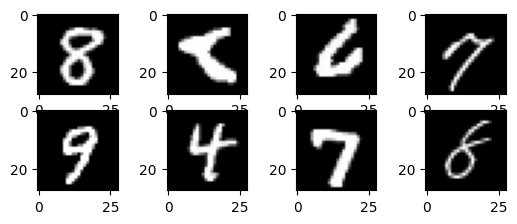

In [6]:
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.imshow(samples[i][0], cmap='gray')

In [7]:
"""class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)

    return out

model=NeuralNet(input_size, hidden_size, num_classes)"""

'class NeuralNet(nn.Module):\n  def __init__(self,input_size,hidden_size, num_classes):\n    super(NeuralNet, self).__init__()\n    self.l1=nn.Linear(input_size,hidden_size)\n    self.relu=nn.ReLU()\n    self.l2=nn.Linear(hidden_size, num_classes)\n\n  def forward(self,x):\n    out=self.l1(x)\n    out=self.relu(out)\n    out=self.l2(out)\n\n    return out\n\nmodel=NeuralNet(input_size, hidden_size, num_classes)'

In [8]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 4 * 4)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
"""#loss_function
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate )"""

'#loss_function\ncriterion=nn.CrossEntropyLoss()\noptimizer=torch.optim.Adam(model.parameters(),lr=learning_rate )'

In [10]:
"""#training_loop
n_total_steps= len(train_loader)
for epoch in range (num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      
    images=images.reshape(-1, 28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1)%100==0:
      print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss{loss.item():.4f}')"""

"#training_loop\nn_total_steps= len(train_loader)\nfor epoch in range (num_epochs):\n  for i, (images, labels) in enumerate(train_loader):\n\n      \n    images=images.reshape(-1, 28*28).to(device)\n    labels=labels.to(device)\n\n    outputs=model(images)\n    loss=criterion(outputs, labels)\n\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n\n    if (i+1)%100==0:\n      print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss{loss.item():.4f}')"

In [11]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


In [12]:
"""#test_loop
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labels in test_loader:
    images=images.reshape(-1, 28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)

    _, predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()

  acc=100.0* n_correct/n_samples
  print(f'accuracy{acc}')
"""

"#test_loop\nwith torch.no_grad():\n  n_correct=0\n  n_samples=0\n  for images, labels in test_loader:\n    images=images.reshape(-1, 28*28).to(device)\n    labels=labels.to(device)\n\n    outputs=model(images)\n\n    _, predictions=torch.max(outputs,1)\n    n_samples+=labels.shape[0]\n    n_correct+=(predictions==labels).sum().item()\n\n  acc=100.0* n_correct/n_samples\n  print(f'accuracy{acc}')\n"

In [13]:
#test_loop
with torch.no_grad():
  n_correct=0
  n_samples=0
  n_class_correct=[0 for i in range(10)]
  n_class_samples=[0 for i in range(10)]

  for images, labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)

    outputs=model(images)

    _, predicted=torch.max(outputs,1)
    n_samples+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()

    for i in range(len(labels)):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc=100.0* n_correct/n_samples
  print(f'Accuracy of the network:{acc}')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')



Accuracy of the network:92.68
Accuracy of ZERO: 95.61224489795919 %
Accuracy of ONE: 97.44493392070484 %
Accuracy of TWO: 89.24418604651163 %
Accuracy of THREE: 93.36633663366337 %
Accuracy of FOUR: 84.62321792260693 %
Accuracy of FIVE: 92.48878923766816 %
Accuracy of SIX: 96.65970772442589 %
Accuracy of SEVEN: 92.80155642023347 %
Accuracy of EIGHT: 93.94250513347022 %
Accuracy of NINE: 90.18830525272547 %
